

---


# <font color='LightSteelBlue'>**Pre-Processing**</font>


---



## <font color='MediumPurple'>Importing Packages </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore') 

## <font color='MediumPurple'>**Our Data about changing weather in Saudi Arabia**</font>

<font color='Peru'>The Kingdom of Saudi Arabia has started the process of Cloud seeding recently
in early April 2022 , the Kingdom began the first phase of a cloud-seeding program
The goal behind this is to increase the rate of rain seeding and improve the Kingdom's climate
Note that the Kingdom is one of the driest countries in the world, and does not contain permanent of water such as rivers 
So in the next few years the weather in the kingdom will be nice and full of clouds</font>

## <font color='MediumPurple'>Loading Dataset and initial exploration first 5 rows</font>


In [2]:
df = pd.read_csv("saudi-hourly-weather-data.csv") 

In [3]:
df.shape

(300000, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   YEAR                                    300000 non-null  int64  
 1   station_country                         300000 non-null  object 
 2   station_name                            300000 non-null  object 
 3   station_id                              300000 non-null  int64  
 4   observation_date                        300000 non-null  object 
 5   latitude                                300000 non-null  float64
 6   longitude                               300000 non-null  float64
 7   elevation                               300000 non-null  float64
 8   wind_direction_angle                    300000 non-null  float64
 9   wind_direction_angle_units              300000 non-null  object 
 10  wind_direction_quality                  3000

* <font color='LightSteelBlue'>**description the data for the  numerical coulmn**</font>

In [5]:
df.describe()

,YEAR,station_id,latitude,longitude,elevation,wind_direction_angle,wind_speed_rate,sky_ceiling_height,visibility_distance,air_temperature,air_temperature_dew_point,atmospheric_sea_level_pressure,GEOPOINT
count,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,138337.000000,138329.000000,138329.000000,138328.000000
mean,2020.995467,4.064542e+10,24.478950,42.599886,699.887090,290.962597,4.024879,83803.946883,9713.430713,27.960075,11.594134,6676.328211,23.805628
std,0.804638,3.335318e+08,4.434649,3.880292,579.570654,277.058145,19.149323,33595.882420,15517.522637,36.032489,56.339745,4340.214764,4.573448
min,2020.000000,4.035610e+10,16.901111,36.476381,6.090000,10.000000,0.000000,0.000000,0.000000,-4.000000,-26.000000,990.300000,16.901111
25%,2020.000000,4.039410e+10,20.504275,39.705061,179.220000,110.000000,2.100000,99999.000000,9900.000000,20.600000,2.000000,1012.000000,19.984350
50%,2021.000000,4.042010e+10,25.285306,42.620881,628.490000,240.000000,3.100000,99999.000000,9900.000000,27.000000,8.000000,9999.900000,24.553422
75%,2022.000000,4.105510e+10,27.437917,45.199556,923.000000,320.000000,5.100000,99999.000000,9999.000000,33.000000,14.000000,9999.900000,27.039028
max,2022.000000,4.114010e+10,31.692683,50.152027,2090.310000,999.000000,999.900000,99999.000000,999999.000000,999.900000,999.000000,9999.900000,31.692683


* <font color='Peru'>**return a description about categrecal columns**</font>

In [6]:
df.describe(exclude='number')

,station_country,station_name,observation_date,wind_direction_angle_units,wind_direction_quality,wind_type,wind_speed_rate_units,wind_speed_quality,sky_ceiling_height_units,sky_ceiling_quality,...,visibility_distance_units,visibility_distance_quality,visibility_variability,visibility_variability_quality,air_temperature_units,air_temperature_quality,air_temperature_dew_point_units,air_temperature_dew_point_quality,atmospheric_sea_level_pressure_units,atmospheric_sea_level_pressure_quality
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000,300000,138337,138337,138337,138337,138329,138329,138329,138329
unique,1,33,25901,1,2,3,1,3,1,2,...,1,2,1,1,1,3,1,3,1,3
top,SA,KING KHALED INTL,2021-08-06T00:00:00+03:00,ANGULAR DEGREES,Passed all quality control checks,Normal,METERS PER SECOND,Passed all quality control checks,METERS,Passed gross limits check if element is present,...,METERS,Passed all quality control checks,Missing,Passed gross limits check if element is present,DEGREES CELSIUS,Passed all quality control checks,DEGREES CELSIUS,Passed all quality control checks,HECTOPASCALS,Passed gross limits check if element is present
freq,300000,10694,33,300000,264949,264068,300000,299868,300000,242718,...,300000,299927,138337,138337,138337,138037,138329,136278,138329,87197


In [7]:
# Get the number of missing values per column
df.isna().sum()

YEAR                                           0
station_country                                0
station_name                                   0
station_id                                     0
observation_date                               0
latitude                                       0
longitude                                      0
elevation                                      0
wind_direction_angle                           0
wind_direction_angle_units                     0
wind_direction_quality                         0
wind_type                                      0
wind_speed_rate                                0
wind_speed_rate_units                          0
wind_speed_quality                             0
sky_ceiling_height                             0
sky_ceiling_height_units                       0
sky_ceiling_quality                            0
sky_ceiling_determination                      0
sky_cavok                                      0
visibility_distance 

In [8]:
# Number of Unique values in each columns.
df.nunique()

YEAR                                          3
station_country                               1
station_name                                 33
station_id                                   33
observation_date                          25901
latitude                                     34
longitude                                    34
elevation                                    33
wind_direction_angle                         37
wind_direction_angle_units                    1
wind_direction_quality                        2
wind_type                                     3
wind_speed_rate                              56
wind_speed_rate_units                         1
wind_speed_quality                            3
sky_ceiling_height                           82
sky_ceiling_height_units                      1
sky_ceiling_quality                           2
sky_ceiling_determination                     3
sky_cavok                                     3
visibility_distance                     

* <font color='LightSteelBlue'>**Exploring all the values in each column/feature**</font>

In [10]:
for features in df.columns[1:]:
    print(df[features].value_counts())
    print("\n")

SA    300000
Name: station_country, dtype: int64


KING KHALED INTL                            10694
KING ABDULLAH BIN ABDULAZIZ                 10671
ABHA                                        10654
AL JOUF                                     10647
TAIF                                        10640
KING ABDULAZIZ INTL                         10633
NEJRAN                                      10587
GASSIM                                      10563
AL AHSA                                     10562
ARAR                                        10549
GURIAT                                      10542
AL BAHA                                     10539
RAFHA                                       10530
YENBO                                       10502
SHARURAH                                    10497
TABUK                                       10481
TURAIF                                      10476
WEJH                                        10466
HAIL                                        10429

Passed gross limits check if element is present    87197
Passed all quality control checks                  51112
Suspect                                               20
Name: atmospheric_sea_level_pressure_quality, dtype: int64


16.901111    8604
21.483418    6454
18.240367    6222
20.296139    6062
17.611436    6004
21.679564    5726
18.297286    5551
26.300000    5189
17.466875    5022
24.957640    4781
28.335192    4564
28.365417    4462
26.433333    4442
24.553422    4414
31.692683    4371
25.285306    4363
30.906589    4320
20.504275    4317
24.144244    4291
19.984350    4234
27.437917    4184
31.411942    4180
29.785133    4052
26.198553    3999
29.626419    3882
26.293800    3529
26.265417    2406
21.333333    2244
26.983333    1993
27.039028    1664
24.449867    1636
24.721944     746
21.416667     416
24.709833       4
Name: GEOPOINT, dtype: int64




## <font color='MediumPurple'>Drop Outliers</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'YEAR'),
  Text(1, 0, 'station_id'),
  Text(2, 0, 'latitude'),
  Text(3, 0, 'longitude'),
  Text(4, 0, 'elevation'),
  Text(5, 0, 'wind_direction_angle'),
  Text(6, 0, 'wind_speed_rate'),
  Text(7, 0, 'sky_ceiling_height'),
  Text(8, 0, 'visibility_distance'),
  Text(9, 0, 'air_temperature'),
  Text(10, 0, 'air_temperature_dew_point'),
  Text(11, 0, 'atmospheric_sea_level_pressure'),
  Text(12, 0, 'GEOPOINT')])

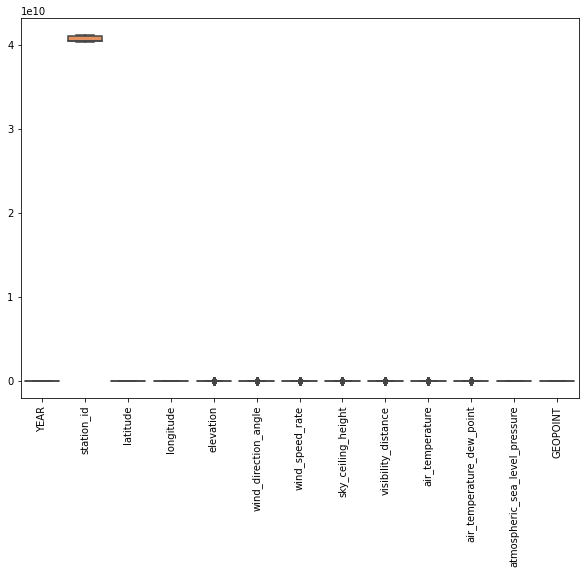

In [11]:
# outlire in dataset
plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x20948753670>,
 'caps': [<matplotlib.lines.Line2D at 0x20948753c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x209487533a0>],
 'medians': [<matplotlib.lines.Line2D at 0x209487611f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x209487614c0>],
 'means': []}

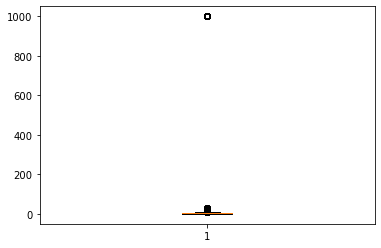

In [12]:
plt.boxplot(df.wind_speed_rate)

* <font color='LightSteelBlue'>**The normal record for the wind speed are less than 10 mile per hour 
and the highst record was 200 mile per hour and that happen in 1934 
so more than that are not corrict as you can see
there is a record tells there was wind speed equal 1000 mile per houre 
so we fix it be deleting this record to have normal rang**</font>

{'whiskers': [<matplotlib.lines.Line2D at 0x209487aa040>,
 'caps': [<matplotlib.lines.Line2D at 0x209487aa4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2094879fd30>],
 'medians': [<matplotlib.lines.Line2D at 0x209487aaa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x209487aad30>],
 'means': []}

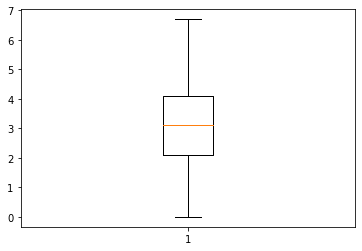

In [13]:
df = df[df.wind_speed_rate <= 7]
plt.boxplot(df.wind_speed_rate)

{'whiskers': [<matplotlib.lines.Line2D at 0x209487fe490>,
 'caps': [<matplotlib.lines.Line2D at 0x209487fea30>,
 'boxes': [<matplotlib.lines.Line2D at 0x209487fe1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x209487fefd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2094880b2e0>],
 'means': []}

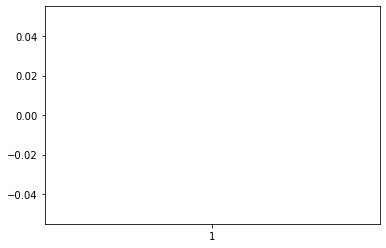

In [14]:
plt.boxplot(df.air_temperature)

 * <font color='Peru'>**it impossipal to have a tempreture more than 55 
so we also delet this record
    And there is some outlaire above 45 and less than 10**</font> 

{'whiskers': [<matplotlib.lines.Line2D at 0x20948845ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2094884f280>,
 'boxes': [<matplotlib.lines.Line2D at 0x209488459d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2094884f820>],
 'fliers': [<matplotlib.lines.Line2D at 0x2094884faf0>],
 'means': []}

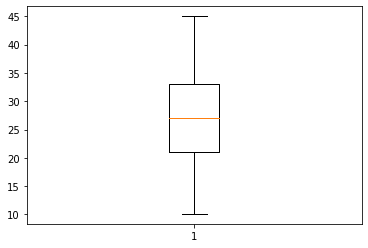

In [15]:
# outlaier 
df = df[df.air_temperature <= 45 ]
df = df[df.air_temperature >10 ]
plt.boxplot(df.air_temperature)

{'whiskers': [<matplotlib.lines.Line2D at 0x20948a66190>,
 'caps': [<matplotlib.lines.Line2D at 0x20948a666d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20948a5ae80>],
 'medians': [<matplotlib.lines.Line2D at 0x20948a66c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x20948a66f40>],
 'means': []}

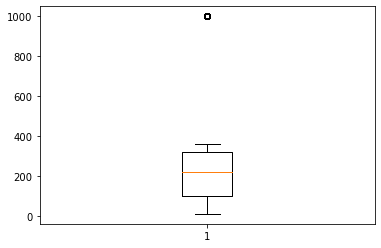

In [16]:
plt.boxplot(df.wind_direction_angle)

* <font color='LightSteelBlue'>**there is 360 degree 
more than that not correct**</font>


In [17]:
df = df[df.wind_direction_angle <= 360 ]

{'whiskers': [<matplotlib.lines.Line2D at 0x20948ab1460>,
 'caps': [<matplotlib.lines.Line2D at 0x20948ab1a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x20948ab1190>],
 'medians': [<matplotlib.lines.Line2D at 0x20948ab1fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20948abb2b0>],
 'means': []}

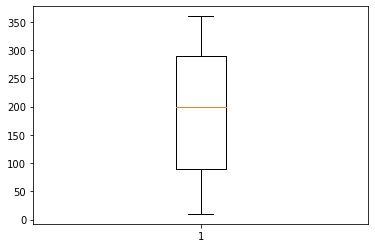

In [18]:
plt.boxplot(df.wind_direction_angle)

### <font color='MediumPurple'>**Missing/duplicate Value**</font> 

* <font color='CornflowerBlue'>**Drop Missing record in cavok (Clouds And Visibility OK)**</font>

In [19]:
df.groupby('sky_cavok').count()

,YEAR,station_country,station_name,station_id,observation_date,latitude,longitude,elevation,wind_direction_angle,wind_direction_angle_units,...,air_temperature,air_temperature_units,air_temperature_quality,air_temperature_dew_point,air_temperature_dew_point_units,air_temperature_dew_point_quality,atmospheric_sea_level_pressure,atmospheric_sea_level_pressure_units,atmospheric_sea_level_pressure_quality,GEOPOINT
sky_cavok,,,,,,,,,,,,,,,,,,,,,
Missing,343,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,343,343,343,343
No,101464,101464,101464,101464,101464,101464,101464,101464,101464,101464,...,101464,101464,101464,101462,101462,101462,101462,101462,101462,101461


In [20]:
df = df[df.sky_cavok != 'Missing']

In [21]:
df.groupby('sky_cavok').count()

,YEAR,station_country,station_name,station_id,observation_date,latitude,longitude,elevation,wind_direction_angle,wind_direction_angle_units,...,air_temperature,air_temperature_units,air_temperature_quality,air_temperature_dew_point,air_temperature_dew_point_units,air_temperature_dew_point_quality,atmospheric_sea_level_pressure,atmospheric_sea_level_pressure_units,atmospheric_sea_level_pressure_quality,GEOPOINT
sky_cavok,,,,,,,,,,,,,,,,,,,,,
No,101464,101464,101464,101464,101464,101464,101464,101464,101464,101464,...,101464,101464,101464,101462,101462,101462,101462,101462,101462,101461


* <font color='Peru'>**Drop Variable and Missing records**</font> 

In [22]:
df.groupby('wind_type').count()

,YEAR,station_country,station_name,station_id,observation_date,latitude,longitude,elevation,wind_direction_angle,wind_direction_angle_units,...,air_temperature,air_temperature_units,air_temperature_quality,air_temperature_dew_point,air_temperature_dew_point_units,air_temperature_dew_point_quality,atmospheric_sea_level_pressure,atmospheric_sea_level_pressure_units,atmospheric_sea_level_pressure_quality,GEOPOINT
wind_type,,,,,,,,,,,,,,,,,,,,,
Normal,101088,101088,101088,101088,101088,101088,101088,101088,101088,101088,...,101088,101088,101088,101086,101086,101086,101086,101086,101086,101085
Variable,376,376,376,376,376,376,376,376,376,376,...,376,376,376,376,376,376,376,376,376,376


In [23]:
df = df[df.wind_type != 'Variable']

In [24]:
df = df[df.wind_type != 'Missing']

In [25]:
df.groupby('wind_type').count()

,YEAR,station_country,station_name,station_id,observation_date,latitude,longitude,elevation,wind_direction_angle,wind_direction_angle_units,...,air_temperature,air_temperature_units,air_temperature_quality,air_temperature_dew_point,air_temperature_dew_point_units,air_temperature_dew_point_quality,atmospheric_sea_level_pressure,atmospheric_sea_level_pressure_units,atmospheric_sea_level_pressure_quality,GEOPOINT
wind_type,,,,,,,,,,,,,,,,,,,,,
Normal,101088,101088,101088,101088,101088,101088,101088,101088,101088,101088,...,101088,101088,101088,101086,101086,101086,101086,101086,101086,101085


* <font color='Peru'>**Drop station_country column it all about Saudi Arabia (SA)**</font>

In [26]:
df.groupby('station_country').count()

,YEAR,station_name,station_id,observation_date,latitude,longitude,elevation,wind_direction_angle,wind_direction_angle_units,wind_direction_quality,...,air_temperature,air_temperature_units,air_temperature_quality,air_temperature_dew_point,air_temperature_dew_point_units,air_temperature_dew_point_quality,atmospheric_sea_level_pressure,atmospheric_sea_level_pressure_units,atmospheric_sea_level_pressure_quality,GEOPOINT
station_country,,,,,,,,,,,,,,,,,,,,,
SA,101088,101088,101088,101088,101088,101088,101088,101088,101088,101088,...,101088,101088,101088,101086,101086,101086,101086,101086,101086,101085


In [27]:
df = df.drop('station_country', axis=1) # All SA

* <font color='CornflowerBlue'>**Drop visibility_variability all the record are missing**</font> 

In [28]:
df.groupby('visibility_variability').count()

,YEAR,station_name,station_id,observation_date,latitude,longitude,elevation,wind_direction_angle,wind_direction_angle_units,wind_direction_quality,...,air_temperature,air_temperature_units,air_temperature_quality,air_temperature_dew_point,air_temperature_dew_point_units,air_temperature_dew_point_quality,atmospheric_sea_level_pressure,atmospheric_sea_level_pressure_units,atmospheric_sea_level_pressure_quality,GEOPOINT
visibility_variability,,,,,,,,,,,,,,,,,,,,,
Missing,101088,101088,101088,101088,101088,101088,101088,101088,101088,101088,...,101088,101088,101088,101086,101086,101086,101086,101086,101086,101085


In [29]:
df = df.drop('visibility_variability', axis=1) # all with Missing value 

* <font color='CornflowerBlue'>**Drop unnecessary or redundant columns**</font> 

In [30]:
df = df.drop('station_id', axis=1)
df = df.drop('latitude', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('wind_direction_angle_units', axis=1)
df = df.drop('wind_direction_quality', axis=1)
df = df.drop('air_temperature_dew_point', axis=1)
df = df.drop('sky_ceiling_quality', axis=1)
df = df.drop('sky_ceiling_height_units', axis=1)
df = df.drop('visibility_distance_quality', axis=1)
df = df.drop('visibility_variability_quality', axis=1)
df = df.drop('air_temperature_units', axis=1)
df = df.drop('air_temperature_quality', axis=1)
df = df.drop('air_temperature_dew_point_units', axis=1)
df = df.drop('air_temperature_dew_point_quality', axis=1)
df = df.drop('atmospheric_sea_level_pressure_units', axis=1)
df = df.drop('atmospheric_sea_level_pressure_quality', axis=1)
df = df.drop('visibility_distance_units', axis=1)
df = df.drop('wind_speed_rate_units', axis=1)
df = df.drop('sky_ceiling_determination', axis=1)
df = df.drop('wind_speed_quality', axis=1)
df = df.drop('atmospheric_sea_level_pressure', axis=1)

* <font color='Peru'>**Parse Float to Int**</font>

In [31]:
df['elevation'] = df['elevation'].astype('int')
df['wind_speed_rate'] = df['wind_speed_rate'].astype('int')
df['air_temperature'] = df['air_temperature'].astype('int')


In [32]:
# Convert date to datetime object_ for look better in visualization
df["observation_date"] = pd.to_datetime(df["observation_date"])

In [33]:
df.head(5)

,YEAR,station_name,observation_date,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_ceiling_height,sky_cavok,visibility_distance,air_temperature,GEOPOINT
2,2020,TURAIF,2020-10-17 12:00:00+03:00,854,160.0,Normal,5,99999.0,No,10000.0,28,31.692683
5,2020,KING KHALED INTL,2020-04-09 03:00:00+03:00,624,50.0,Normal,2,22000.0,No,3000.0,27,24.957640
6,2021,NEJRAN,2021-07-04 06:00:00+03:00,1213,240.0,Normal,3,22000.0,No,10000.0,27,17.611436
8,2020,NEJRAN,2020-03-20 06:00:00+03:00,1213,30.0,Normal,1,22000.0,No,4000.0,18,17.611436
9,2020,PRINCE MOHAMMAD BIN ABDULAZIZ,2020-07-28 13:00:00+03:00,655,270.0,Normal,2,99999.0,No,9999.0,42,24.553422


* <font color='Peru'>**Export this dataset before doing preprocessin and encoding to use it in mapreduce**</font>

In [34]:
df.to_csv('mapreduce_df.csv', index=False)

## <font color='MediumSlateBlue'>**Feature Engineering-Encoding**</font> 




* **<font color='CornflowerBlue'>In features with binary values do the transform to numbers  1 = yes else number = 0 as (SKY_CAVOK) there are two value yes, No.</font>**

* **<font color='CornflowerBlue'>For a categorical features will perform a one hot encoding.</font>**


In [35]:
label_encoder = preprocessing.LabelEncoder()

df['station_name']= label_encoder.fit_transform(df['station_name'])
df['observation_date']= label_encoder.fit_transform(df['observation_date'])
df['wind_type']= label_encoder.fit_transform(df['wind_type'])
df['sky_cavok']= label_encoder.fit_transform(df['sky_cavok'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101088 entries, 2 to 299997
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   YEAR                  101088 non-null  int64  
 1   station_name          101088 non-null  int32  
 2   observation_date      101088 non-null  int32  
 3   elevation             101088 non-null  int32  
 4   wind_direction_angle  101088 non-null  float64
 5   wind_type             101088 non-null  int32  
 6   wind_speed_rate       101088 non-null  int32  
 7   sky_ceiling_height    101088 non-null  float64
 8   sky_cavok             101088 non-null  int32  
 9   visibility_distance   101088 non-null  float64
 10  air_temperature       101088 non-null  int32  
 11  GEOPOINT              101085 non-null  float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 7.3 MB


In [37]:
df.head()

,YEAR,station_name,observation_date,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_ceiling_height,sky_cavok,visibility_distance,air_temperature,GEOPOINT
2,2020,29,5558,854,160.0,0,5,99999.0,0,10000.0,28,31.692683
5,2020,17,1702,624,50.0,0,2,22000.0,0,3000.0,27,24.957640
6,2021,19,10854,1213,240.0,0,3,22000.0,0,10000.0,27,17.611436
8,2020,19,1240,1213,30.0,0,1,22000.0,0,4000.0,18,17.611436
9,2020,21,4046,655,270.0,0,2,99999.0,0,9999.0,42,24.553422


In [38]:
df.shape

(101088, 12)

* <font color='Peru'>**Export the final dataset after doing preprocessin and encoding**</font>

In [39]:
df.to_csv('Final_df.csv', index=False)